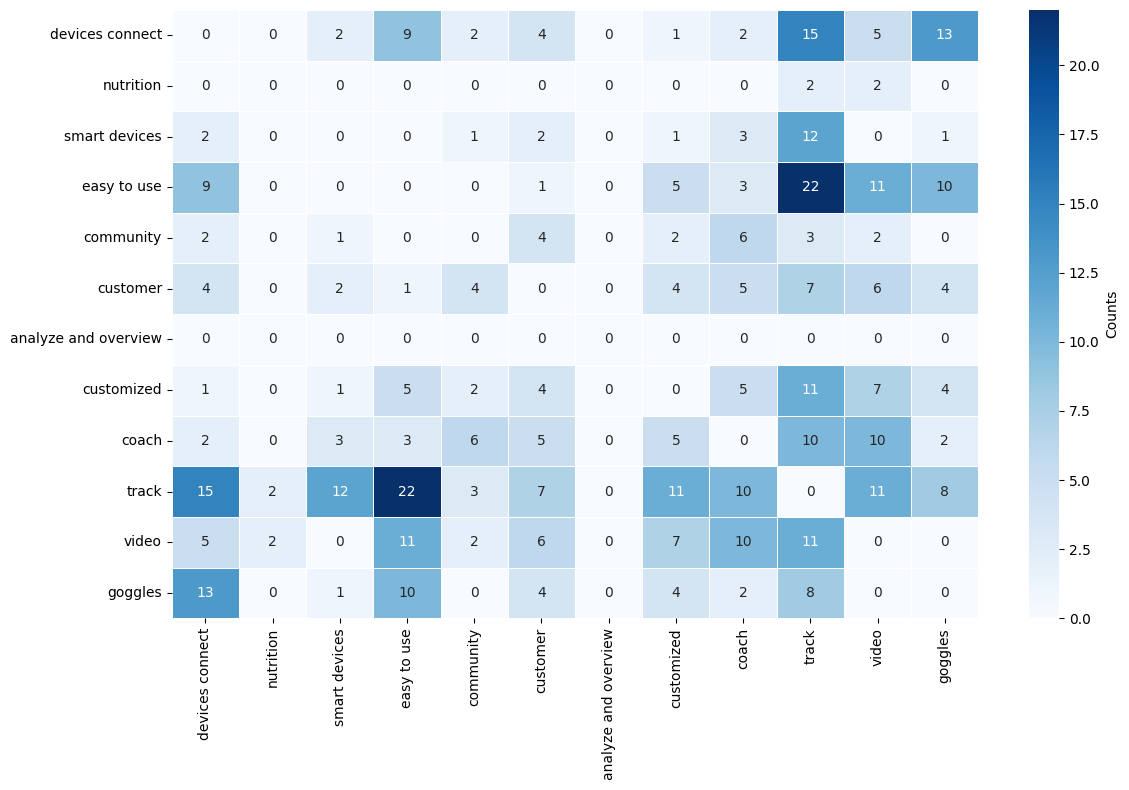

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Correct data based on your confirmed image
data = {
    'devices connect': [0, 0, 2, 9, 2, 4, 0, 1, 2, 15, 5, 13],
    'nutrition': [0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0],
    'smart devices': [2, 0, 0, 0, 1, 2, 0, 1, 3, 12, 0, 1],
    'easy to use': [9, 0, 0, 0, 0, 1, 0, 5, 3, 22, 11, 10],
    'community': [2, 0, 1, 0, 0, 4, 0, 2, 6, 3, 2, 0],
    'customer': [4, 0, 2, 1, 4, 0, 0, 4, 5, 7, 6, 4],
    'analyze and overview': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'customized': [1, 0, 1, 5, 2, 4, 0, 0, 5, 11, 7, 4],
    'coach': [2, 0, 3, 3, 6, 5, 0, 5, 0, 10, 10, 2],
    'track': [15, 2, 12, 22, 3, 7, 0, 11, 10, 0, 11, 8],
    'video': [5, 2, 0, 11, 2, 6, 0, 7, 10, 11, 0, 0],
    'goggles': [13, 0, 1, 10, 0, 4, 0, 4, 2, 8, 0, 0],
}

# Defining the row labels
row_labels = [
    "devices connect", "nutrition", "smart devices", "easy to use", "community", 
    "customer", "analyze and overview", "customized", "coach", "track", "video", "goggles"
]

# Creating the DataFrame
df = pd.DataFrame(data, index=row_labels)

# Plotting the heatmap
plt.figure(figsize=(12, 8))
ax = sns.heatmap(df, annot=True, fmt="d", cmap="Blues", cbar_kws={'label': 'Counts'}, linewidths=0.5, vmin=0)

# Display the plot
plt.tight_layout()
plt.show()


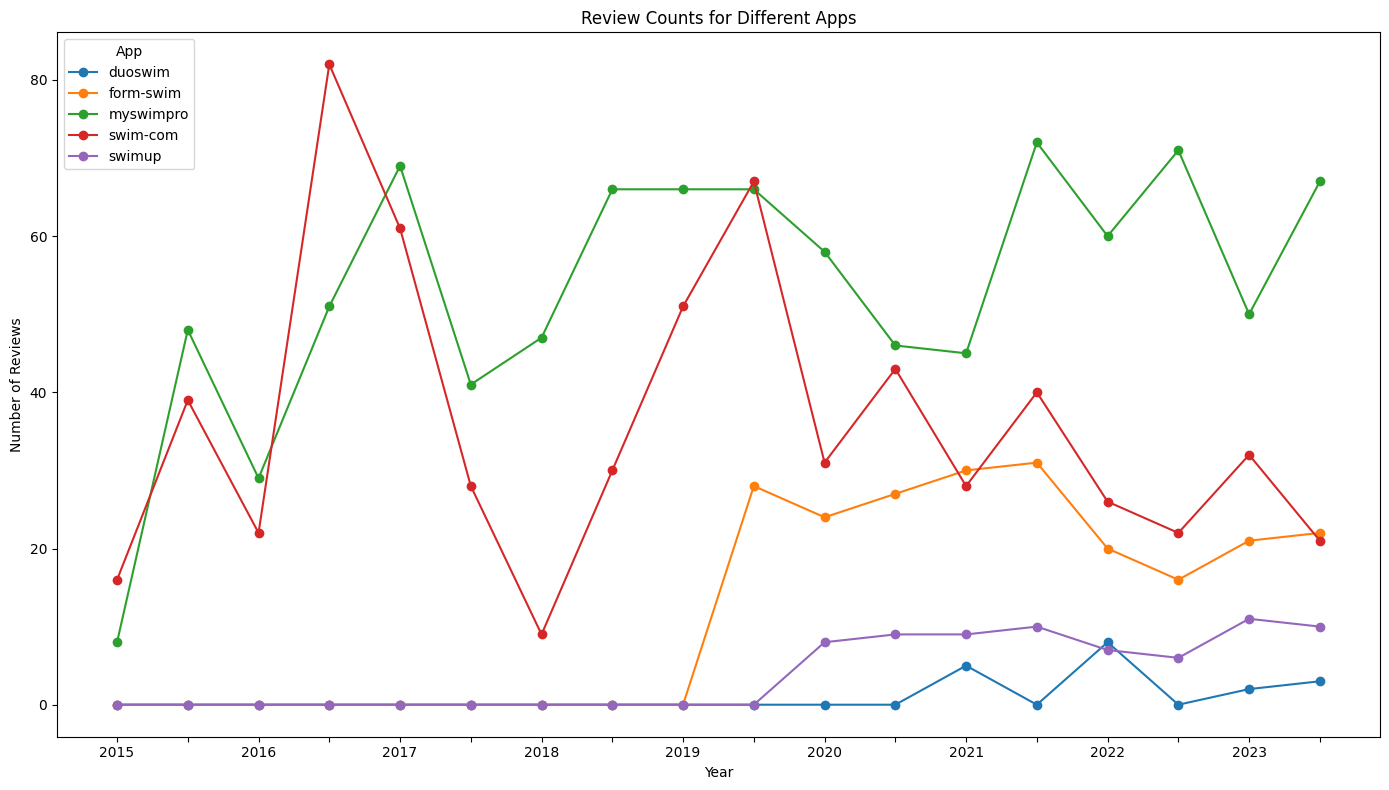

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取 CSV 文件
df = pd.read_csv('new_result/all_concat.csv')

# 确保 'date' 列是 datetime 类型
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# 添加半年度列
df['half_year'] = df['date'].dt.month.apply(lambda x: 'H1' if x <= 6 else 'H2')

# 添加年份列
df['year'] = df['date'].dt.year

# 按 app、year 和 half_year 分组，计算每个分组的评论数量
review_counts = df.groupby(['app', 'year', 'half_year']).size().reset_index(name='counts')

# 创建合并年份和半年的 period 列
review_counts['period'] = review_counts['year'].astype(str) + " " + review_counts['half_year']

# 将 period 列转换为类别变量，并按年和半年排序
review_counts['period'] = pd.Categorical(
    review_counts['period'], 
    categories=sorted(review_counts['period'].unique()), 
    ordered=True
)

# 按时间顺序排列 period
pivot_table = review_counts.pivot(index='period', columns='app', values='counts').fillna(0)
pivot_table = pivot_table.sort_index()

# 绘制折线图
plt.figure(figsize=(14, 8))

# 每个 app 一条折线，使用默认颜色
for app in pivot_table.columns:
    plt.plot(pivot_table.index, pivot_table[app], marker='o', linestyle='-', label=app)

# 生成显示的年份列表，显示每年一次
unique_years = review_counts['year'].unique()
xtick_labels = [str(y)[:4] if i % 2 == 0 else "" for i, y in enumerate(pivot_table.index)]

# 使用 period 作为时间轴，但只显示年份
plt.xticks(ticks=range(len(pivot_table.index)), labels=xtick_labels)

# 添加标题和标签
plt.title('Review Counts for Different Apps')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')

# 添加图例
plt.legend(title='App', loc='upper left')

# 显示图表
plt.tight_layout()  # Adjust layout to make room for rotated x labels
plt.show()
